# Membuat source model xml untuk OpenQuake

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from custom_openquake import *

## Cara menentukan nilai minimum dan maksimum magnitudo
1. Patahan: Minimum = 6.5, Maksimum = dari PuSGeN atau menggunakan persamaan scaling law
2. Megathrust: Minimum = Mc, Maksimum = dari PuSGeN atau menggunakan persamaan scaling law
3. Shallow Background: Minimum = Mc, Maksimum = 6.5
4. Deep Background: Minimum = Mc, Maksimum = Maksimum megnitudo dari data katalog 

## Informasi mengenai rake

Rake merupakan sudut yang terbentuk antara arah slip dan strike, besarnya sudut berlawanan dengan arah jarum jam.

1. Sesar geser arah kanan = 180
2. Sesar geser arah kiri = 0
3. Sesar turun = -90
4. Sesar naik = 90

## 2. Patahan

In [2]:
line_faults = geoms_to_polyOQ('tmp_OQ003_fault_geoms.pkl', type_of="fault")
print(f"terdapat {len(line_faults)} patahan individu")

terdapat 1 patahan individu


<AxesSubplot:>

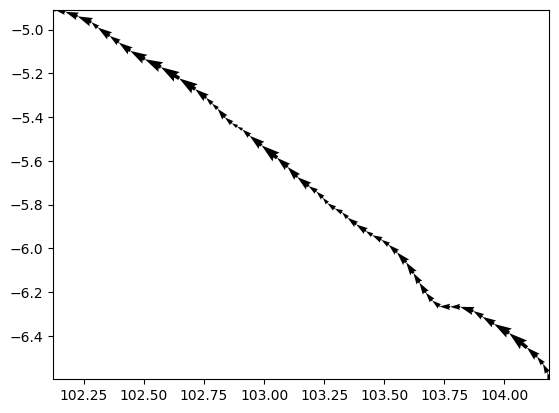

In [3]:
plot_line(line_faults[0]) # melihat arah strike (pastikan kaidah tangan kanan sudah sesuai dengan patahan)

In [4]:
line_faults[0] = reverse_line(line_faults[0])

<AxesSubplot:>

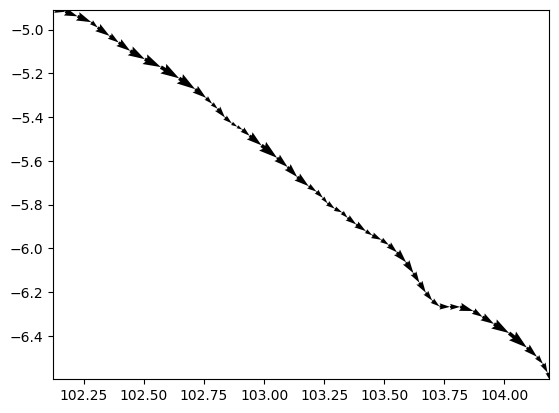

In [5]:
plot_line(line_faults[0])

In [6]:
mtk_simple_faults = []
mtk_simple_faults.append(mtkSimpleFaultSource(
    identifier="101", 
    name="Enggano",
    trt="Active Shallow Crust",
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(6.5, 7.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val, 
    rake=-90.
))
mtk_simple_faults[0].create_geometry(
    line_faults[0], # index sesuai dengan urutan dari total patahan
    dip = 45., 
    upper_depth = 0., 
    lower_depth = 20.,
    mesh_spacing=1.0
)

mtk_simple_faults.append(mtkSimpleFaultSource(
    identifier="102", 
    name="Enggano",
    trt="Active Shallow Crust",
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(6.5, 7.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val, 
    rake=-90.
))
mtk_simple_faults[1].create_geometry(
    line_faults[1], # index sesuai dengan urutan dari total patahan
    dip = 45., 
    upper_depth = 0., 
    lower_depth = 20.,
    mesh_spacing=1.0
)

# mtk_simple_faults.append(mtkSimpleFaultSource(
#     identifier="101", 
#     name="Enggano",
#     trt="Active Shallow Crust",
#     mag_scale_rel="WC1994", 
#     rupt_aspect_ratio=1.0, 
#     mfd=TruncatedGRMFD(6.5, 7.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val, 
#     rake=-90.
# ))
# mtk_simple_faults[1].create_geometry(
#     line_faults[1], # index sesuai dengan urutan dari total patahan
#     dip = 45., 
#     upper_depth = 0., 
#     lower_depth = 20.,
#     mesh_spacing=1.0
# )

mtk_simple_faults.append(mtkSimpleFaultSource(
    identifier="101", 
    name="Enggano",
    trt="Active Shallow Crust",
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(6.5, 7.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val, 
    rake=-90.
))
mtk_simple_faults[2].create_geometry(
    line_faults[2], # index sesuai dengan urutan dari total patahan
    dip = 45., 
    upper_depth = 0., 
    lower_depth = 20.,
    mesh_spacing=1.0
)

In [7]:
model_simple_faults = mtkSourceModel(
    identifier="0001", 
    name="Individual Faults", 
    sources=mtk_simple_faults
)

In [8]:
model_simple_faults.serialise_to_nrml('./xmlfiles/individual_faults.xml', use_defaults=False)

## 3. Megathrust

In [9]:
complex_megathrust = geoms_to_polyOQ("tmp_OQ003_megathrust_geoms.pkl", type_of="megathrust")
print(f"terdapat {len(complex_megathrust)} megathrust")

terdapat 2 megathrust


<AxesSubplot:>

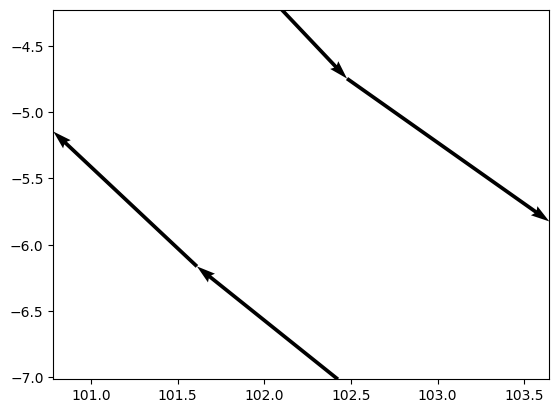

In [10]:
plot_megathrust(complex_megathrust[0]) # melihat arah strike (pastikan kaidah tangan kanan sudah sesuai dengan patahan)


In [11]:
idx = 0
complex_megathrust[idx] = reverse_megathrust(complex_megathrust[idx], part_of='lower') # lower, upper, both

<AxesSubplot:>

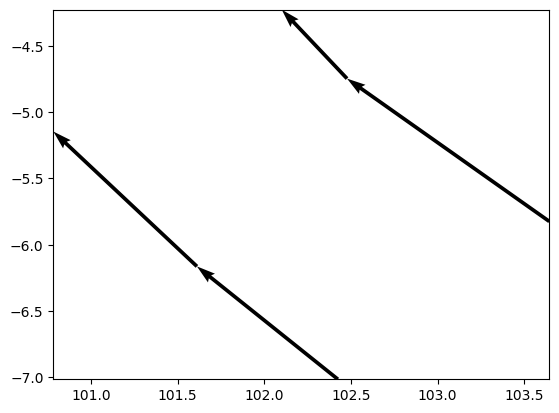

In [12]:
plot_megathrust(complex_megathrust[0])


<AxesSubplot:>

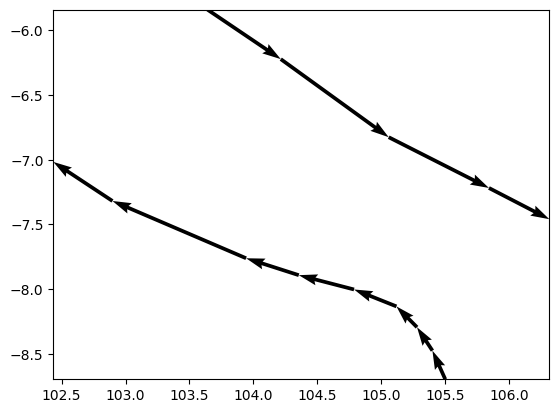

In [13]:
plot_megathrust(complex_megathrust[1]) # melihat arah strike (pastikan kaidah tangan kanan sudah sesuai dengan patahan)


In [14]:
idx = 1
complex_megathrust[idx] = reverse_megathrust(complex_megathrust[idx], part_of='lower')

<AxesSubplot:>

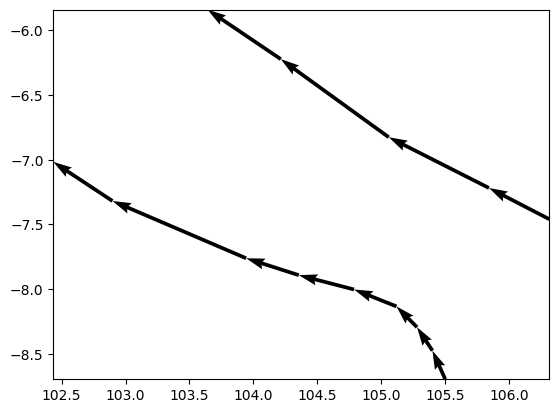

In [15]:
plot_megathrust(complex_megathrust[1])


In [16]:
mtk_megathrusts = []
mtk_megathrusts.append(mtkComplexFaultSource(
    identifier="102", 
    name="Megathrust 1",
    trt="Subduction Interface",
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(4., 7., 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val, 
    rake=90.
))
mtk_megathrusts[0].create_geometry(
    complex_megathrust[0], # index sesuai dengan urutan dari total patahan
    mesh_spacing=20.0
)

mtk_megathrusts.append(mtkComplexFaultSource(
    identifier="103", 
    name="Megathrust 2",
    trt="Subduction Interface",
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(4., 7., 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val, 
    rake=90.
))
mtk_megathrusts[1].create_geometry(
    complex_megathrust[1], # index sesuai dengan urutan dari total patahan
    mesh_spacing=20.0
)

In [17]:
model_megathrusts = mtkSourceModel(
    identifier="0002", 
    name="Megathrusts", 
    sources=mtk_megathrusts
)

In [18]:
model_megathrusts.serialise_to_nrml('./xmlfiles/megathrusts.xml', use_defaults=False)

## 4. Shallow Background

In [19]:
poly_shallow = geoms_to_polyOQ("tmp_OQ003_shallow_background_geoms.pkl", type_of="shallow_background")
print(f"terdapat {len(poly_shallow)} shallow background")

terdapat 1 shallow background


In [20]:
mtk_shallow_background = []
mtk_shallow_background.append(mtkAreaSource(
    identifier="104", 
    name="Shallow Background 1",
    trt="Stable Continental Crust",
    geometry=poly_shallow[0], # index sesuai dengan urutan dari total shallow background
    upper_depth=0, 
    lower_depth=20, 
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(3., 6.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val
    nodal_plane_dist=PMF([
        (0.5, NodalPlane(135.0, 90.0, 0.0)), # (probability, NodalPlane(strike, dip, rake))
        (0.5, NodalPlane(315.0, 90.0, 0.0))
    ]), 
    hypo_depth_dist=PMF([
        (0.5, 10.0), # (probability, depth)
        (0.5, 20.0)
    ])))

mtk_shallow_background.append(mtkAreaSource(
    identifier="104", 
    name="Shallow Background 2",
    trt="Stable Continental Crust",
    geometry=poly_shallow[1], # index sesuai dengan urutan dari total shallow background
    upper_depth=0, 
    lower_depth=20, 
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(3., 6.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val
    nodal_plane_dist=PMF([
        (0.5, NodalPlane(135.0, 90.0, 0.0)), # (probability, NodalPlane(strike, dip, rake))
        (0.5, NodalPlane(315.0, 90.0, 0.0))
    ]), 
    hypo_depth_dist=PMF([
        (0.5, 10.0), # (probability, depth)
        (0.5, 20.0)
    ])))

In [21]:
model_shallow_background = mtkSourceModel(
    identifier="0003", 
    name="Shallow Background", 
    sources=mtk_shallow_background
)

In [22]:
model_shallow_background.serialise_to_nrml('./xmlfiles/shallow_background.xml', use_defaults=False)

## 5. Deep Background

In [23]:
poly_deep = geoms_to_polyOQ("tmp_OQ003_deep_background_geoms.pkl", type_of="deep_background")
print(f"terdapat {len(poly_deep)} deep background")

terdapat 1 deep background


In [24]:
mtk_deep_background = []
mtk_deep_background.append(mtkAreaSource(
    identifier="105", 
    name="Deep Background 1",
    trt="Subduction IntraSlab",
    geometry=poly_deep[0], # index sesuai dengan urutan dari total shallow background
    upper_depth=50, 
    lower_depth=150, 
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(3., 6.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val
    nodal_plane_dist=PMF([
        (0.5, NodalPlane(135.0, 90.0, 0.0)), # (probability, NodalPlane(strike, dip, rake))
        (0.5, NodalPlane(315.0, 90.0, 0.0))
    ]), 
    hypo_depth_dist=PMF([
        (0.5, 100.0), # (probability, depth)
        (0.5, 150.0)
    ])))
mtk_deep_background.append(mtkAreaSource(
    identifier="106", 
    name="Deep Background 2",
    trt="Subduction IntraSlab",
    geometry=poly_deep[0], # index sesuai dengan urutan dari total shallow background
    upper_depth=150, 
    lower_depth=250, 
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(3., 6.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val
    nodal_plane_dist=PMF([
        (0.5, NodalPlane(135.0, 90.0, 0.0)), # (probability, NodalPlane(strike, dip, rake))
        (0.5, NodalPlane(315.0, 90.0, 0.0))
    ]), 
    hypo_depth_dist=PMF([
        (0.5, 200.0), # (probability, depth)
        (0.5, 250.0)
    ])))
mtk_deep_background.append(mtkAreaSource(
    identifier="107", 
    name="Deep Background 3",
    trt="Subduction IntraSlab",
    geometry=poly_deep[0], # index sesuai dengan urutan dari total shallow background
    upper_depth=250, 
    lower_depth=350, 
    mag_scale_rel="WC1994", 
    rupt_aspect_ratio=1.0, 
    mfd=TruncatedGRMFD(3., 6.5, 0.1, 5.03, 1.26), # min_mag, max_mag, bin_width, a_val, b_val
    nodal_plane_dist=PMF([
        (0.5, NodalPlane(135.0, 90.0, 0.0)), # (probability, NodalPlane(strike, dip, rake))
        (0.5, NodalPlane(315.0, 90.0, 0.0))
    ]), 
    hypo_depth_dist=PMF([
        (0.5, 300.0), # (probability, depth)
        (0.5, 350.0)
    ])))

In [25]:
model_deep_background = mtkSourceModel(
    identifier="0004", 
    name="Deep Background", 
    sources=mtk_deep_background
)

In [26]:
model_deep_background.serialise_to_nrml('./xmlfiles/deep_background.xml', use_defaults=False)

In [27]:
# menyalin hasil di folder xmlfiles ke oqfiles
copytree('./xmlfiles/', './oqfiles/single_ruptures/other_sources/')